# Агломеративная иерархическая кластеризация 

### Описание алгоритма
1. $C \leftarrow \{C_i = \{x_i\} | x_i \in D\}$ //Каждая точка в отдельном кластере
2. $\Delta \leftarrow \{d(x_i,x_j): x_i, x_j \in D\}$ //Вычислить матрицу расстояний
3. повторить 
    - Найти ближайшую пару кластеров $C_i,C_j \in C$
    - $ C_{ij} \leftarrow C_i \cup C_j$// Объединение кластеров
    - $ C \leftarrow \{C_i\} \cup \{C_j\} \cup \{C_{ij}\}$
    - Обновить матрицу расстояния $\Delta$, чтобы провести новую кластеризацию до $|C| = k$

### Импортируем нужные библиотеки
Pandas - для удобной работы с данными, matplotlib - для визуализации, numpy - для математики, pylab - для кластерной фиуализации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl 

### Считаем данные в DataFrame

In [2]:
data = pd.read_csv('Lab3Train.csv', index_col=0)
#вывести пять случайных строк таблицы
data.head(10)

,x,y
1,100,5
2,90,5
3,110,5
4,97,4
5,102,4
6,112,4
7,92,4
8,95,3
9,90,3
10,100,3


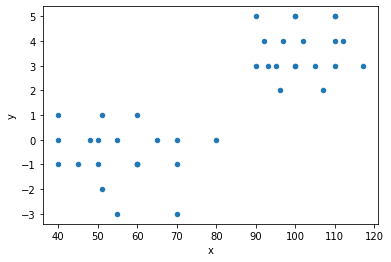

In [3]:
#параметр scatter для графиков рассеяния
data.plot(kind='scatter', x='x', y='y')
plt.show()

In [4]:
dataset = [(float(data['x'][i]), float(data['y'][i])) for i in range(1,len(data.index)+1)]

### Определим функцию для подсчета расстояния между двумя точками
Функция будет считать расстояние между двумя точками $(a_1, b_1)$ и $(a_2, b_2)$ используя Евлидову метрику
$$ \sqrt{(a_1-a_2)^2+(b_1-b_2)^2}$$

In [5]:
def distance(x, y):
     return ((x[0]-y[0])**2+(x[1]-y[1])**2)**(1/2)

Следующие ячейки определяют функции для вычисления расстояния/близости между двумя класстерами разными способами. 

In [6]:
def min_distance(Ci, Cj):
    return min(distance(i, j) for i in Ci for j in Cj) 

Минимальное рассстояние между кластерами $C_i$ и $C_j$ считается как:
$$min\_distance(C_i, C_j)=min(x \in C_i, y \in C_j)[distance(x,y)] $$

In [7]:
def max_distance(Ci, Cj):
      return max(distance(i, j) for i in Ci for j in Cj)

Максимальное рассстояние между кластерами $C_i$ и $C_j$ считается как:
$$max\_distance(C_i, C_j)=max(x \in C_i, y \in C_j)[distance(x,y)] $$

In [8]:
def avg_distance(Ci, Cj):
      return sum(distance(i, j) for i in Ci for j in Cj)/(len(Ci)*len(Cj)) 

Среднее рассстояние между кластерами $C_i$ и $C_j$ считается как:
$$avg\_distance(C_i, C_j)= \frac{1}{|C_i||C_j|} \sum_{x \in C_i} \sum_{y \in C_j}[distance(x,y)]$$

Define a function to calculate minimum distance between two clusters.

In [9]:
def minimum(A):
    min = 1000
    a = 0; b = 0 
    for x in range(len(A)):
        for y in range(len(A[x])):
            if x != y and A[x][y] < min:
                min = A[x][y];a = x; b = y
    return (a, b, min) 

### Функция для формирования кластеров

In [12]:
def aglomerative_clasterisation(ds, distance, k):
#     инициализируем два пустых списка для хранения кластеров (список С)
#     и расстояний между кластерами (список M). Расстояние зависит от
#     метода, который подан на вход 
    C = [];M = []
#     для каждой точки в датасете
    for i in ds: 
        Ci = []
#         добавляем точку i в i-й кластер 
        Ci.append(i) 
#         добавляем i-й кластер в список кластеров С
        C.append(Ci)
#     для всех точек в спсике кластеров
    for i in C:
#         инициализируем список для точки i 
        Mi = []
#         для всех точек j в кластере С (включая саму себя)
        for j in C:
#             считаем расстояние от точки i до всех 
#             точек j и добавляем в список
            Mi.append(distance(i, j))
#         добавляем расстояние для каждой точки i в список M
        M.append(Mi)
#     переменная q - записывает количество кластеров, сформированных
#     в любой момент врмени. q - инициализируется как длина набора данных 
#     потому что изначально мы считаем, что каждая точка в отдельном кластере
#     когда мы объединяем кластеры - значение q уменьшается
    q = len(ds)
#     объединяем кластеры до тех пор, пока q не станет равным k 
    while q > k:
#         находим кластеры с минимальм расстоянием
        x, y, min = minimum(M)
#         добавляем кластер C[y] в кластерную группу C[x] (объединяем)
        C[x].extend(C[y])
#         удаляем класте C[y] из списка кластеров
        C.remove(C[y])
#         пересчитываем расстояния
        M = []
        for i in C:
            Mi = []
            for j in C:
                Mi.append(distance(i, j))
            M.append(Mi)
        q -= 1
#     Возвращаем список кластеро
    return C

def plot(C):
    color_Value = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
#     для каждого кластера в списке кластеров
    for i in range(len(C)):
        coordinate_X = []    
        coordinate_Y = []    
        for j in range(len(C[i])):
            coordinate_X.append(C[i][j][0])
            coordinate_Y.append(C[i][j][1])
        pl.scatter(coordinate_X, coordinate_Y, marker='o', color=color_Value[i%len(color_Value)])

#     pl.legend(loc='upper right')
    pl.show()

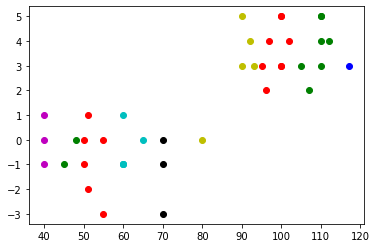

In [20]:
C = aglomerative_clasterisation(dataset,max_distance, 10)
plot(C)